### Ejemplo de uso de Matplotlib-venn con datos

Python y R son los lenguajes de código abierto más utilizados para la ciencia de la información y el aprendizaje automático. Si bien ambos lenguajes tienen sus propias ventajas y desventajas, depende del propósito al seleccionar un lenguaje. El ejemplo siguiente se basa en datos recolectados de profesionales que utilizan uno o ambos de éstos lenguajes.

C:\Users\ivaga\AppData\Local\Temp\ipykernel_16964\2706358081.py:7: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  mc=pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1')


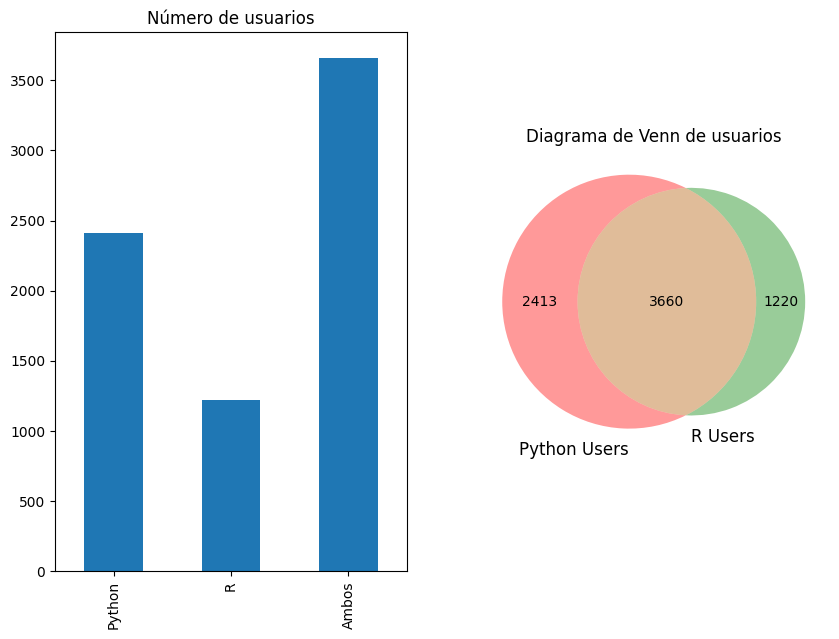

In [2]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

import warnings

mc=pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1')
cr=pd.read_csv('conversionRates.csv')
cr.drop('Unnamed: 0',axis=1,inplace=True)
resp=mc.dropna(subset=['WorkToolsSelect'])
resp=resp.merge(cr,left_on='CompensationCurrency',right_on='originCountry',how='left')
python=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(~resp['WorkToolsSelect'].str.contains('R'))]
R=resp[(~resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
both=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]

f,ax=plt.subplots(1,2,figsize=(10,7))
pd.Series([python.shape[0],R.shape[0],both.shape[0]],index=['Python','R','Ambos']).plot.bar(ax=ax[0])
ax[0].set_title('Número de usuarios')
venn2(subsets = (python.shape[0],R.shape[0],both.shape[0]), set_labels = ('Python Users', 'R Users'))
plt.title('Diagrama de Venn de usuarios')
plt.show()